# Practicing and Understanding Working of Decision Tree Classifiers and Regressions

### Using non-linear datasets called moons

In [37]:
import numpy as np
random_state=42

In [38]:
import matplotlib as mpl

In [39]:
import matplotlib.pyplot as plt

In [40]:
from sklearn.datasets import make_moons

In [41]:
X,y=make_moons(n_samples=100, noise=0.15, random_state=42)

In [42]:
X[0], y[0], X[50], y[50]

(array([ 1.61383833, -0.49115086]), 1, array([-0.22452786,  1.01733299]), 0)

In [43]:
X[:,0][y==0].max(), X[:,0][y==0].min()

(1.2752221622422337, -1.2720155884887554)

In [44]:
X[:,1][y==0].max(), X[:,1][y==0].min()

(1.2711135917248466, -0.1795630595007453)

In [45]:
X[:,0][y==1].max(),X[:,0][y==1].min()

(2.4093807207967215, -0.06516218662264421)

In [46]:
X[:,1][y==1].max(),X[:,1][y==1].min()

(0.7055096982472316, -0.6491427462708279)

In [47]:
def plot_dataset(X,y,axes):
    plt.plot(X[:,0][y==0],X[:,1][y==0],"bs")
    plt.plot(X[:,0][y==1],X[:,1][y==1],"g^")
    plt.axis(axes)
    plt.grid(True, which='both')    

In [48]:
axes=[-1.5,2.5,-1,1.5]

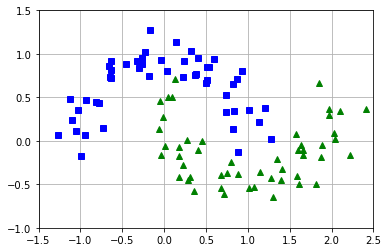

In [49]:
plot_dataset(X,y,axes)

In [50]:
def plot_predictions(model, axes,title=""):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = model.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.title("${}$".format(title))

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
tree_clf=DecisionTreeClassifier(max_depth=2,random_state=42)

In [53]:
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=42)

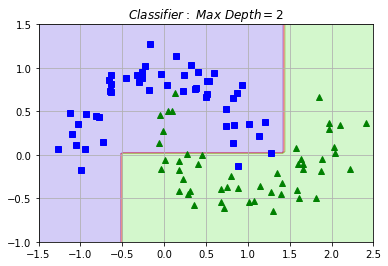

In [54]:
plot_dataset(X,y,axes)
plot_predictions(tree_clf,axes,"Classifier:\ Max\ Depth =2")

#1 Underfitting with only 2 splits allowed

#2 All decision boundaries are orthogonal to each other


In [55]:
tree_clf=DecisionTreeClassifier(random_state=42)

In [56]:
tree_clf.fit(X,y)

DecisionTreeClassifier(random_state=42)

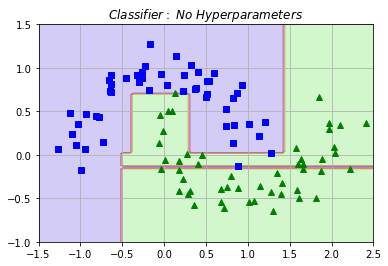

In [57]:
plot_dataset(X,y,axes)
plot_predictions(tree_clf,axes,"Classifier:\ No\ Hyperparameters")

If no hyperparameters declared gross overfitting.

In [58]:
from sklearn.tree import DecisionTreeRegressor

In [59]:
tree_reg=DecisionTreeRegressor(max_depth=2,random_state=36)

In [60]:
tree_reg.fit(X,y)

DecisionTreeRegressor(max_depth=2, random_state=36)

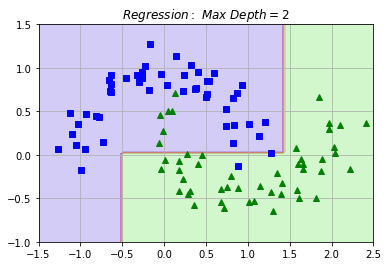

In [61]:
plot_dataset(X,y,axes)
plot_predictions(tree_reg,axes,"Regression:\ Max\ Depth = 2")

In [62]:
tree_reg=DecisionTreeRegressor(random_state=36)

In [63]:
tree_reg.fit(X,y)

DecisionTreeRegressor(random_state=36)

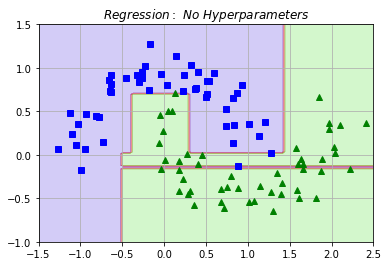

In [64]:
plot_dataset(X,y,axes)
plot_predictions(tree_reg,axes,"Regression:\ No\ Hyperparameters")

Classifier and regressors work very similarly in case of only two features

In [65]:
tree_reg=DecisionTreeRegressor(max_depth=4,random_state=36)

In [66]:
tree_reg.fit(X,y)

DecisionTreeRegressor(max_depth=4, random_state=36)

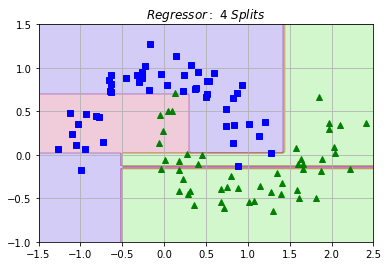

In [67]:
plot_dataset(X,y,axes)
plot_predictions(tree_reg,axes,"Regressor:\ 4\ Splits")

###  See if scaling can help us

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
from sklearn.pipeline import Pipeline

In [70]:
tree_reg_pipe=Pipeline([
    ('scaler',StandardScaler()),
    ('model',DecisionTreeRegressor(max_depth=4,random_state=42))
])

In [71]:
tree_reg_pipe.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', DecisionTreeRegressor(max_depth=4, random_state=42))])

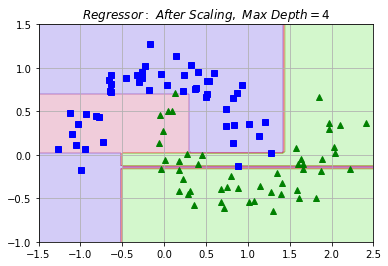

In [72]:
plot_dataset(X,y,axes)
plot_predictions(tree_reg_pipe,axes,"Regressor:\ After\ Scaling,\ Max\ Depth=4")

No, not in this case